# Data Filtering 

## Author(s)

Ben Smith

## Existing Notebooks

[Clouds and Data Filtering](https://github.com/ICESAT-2HackWeek/Clouds_and_data_filtering/blob/master/notebooks/Clouds_and_data_quality_rendered.ipynb)

## Learning Outcomes

* Understanding how clouds affect laser-altimetry signals

* Recognizing how these effects are manifest in the ATL06 product

* Gaining familiarity with the ATL06 parameters that can identify cloudy 
returns This part of the tutorial will focus on clouds that cause gross 
errors in surface-height estimates.

### Notes



TBD:

-> Replicate the intro material
* copy content and images from the clouds_and_data_filtering notebook

-> Replicate the Byrd example:
* Find a basemap image (MOA from the cloud?)
* Make a Byrd Glacier polygon
* Find a suitable track with EarthAccess (look at ATL06es)
  ** Track 982 looks good.  
* Figure out how to get ATL03 data for the track
  

In [1]:
# SlideRule request for ATL06 over Byrd.  
# Can add track 982 to simply the request.

In [4]:
import earthaccess
import xarray as xr
import pprint
import matplotlib.pyplot as plt
import numpy as np

In [34]:
poly= [
      {
        "lon": 152.75574911647576,
        "lat": -81.21829026763271
      },
      {
        "lon": 157.3571761682183,
        "lat": -80.71048087173712
      },
      {
        "lon": 158.02766982432937,
        "lat": -80.55426349923613
      },
      {
        "lon": 157.09423747954733,
        "lat": -80.39105506808406
      },
      {
        "lon": 151.36217406651946,
        "lat": -80.92240258329097
      },
      {
        "lon": 152.75574911647576,
        "lat": -81.21829026763271
      }
    ]



((151.36, -81.22, 158.03, -80.39),
 [(152.75574911647576, -81.21829026763271),
  (157.3571761682183, -80.71048087173712),
  (158.02766982432937, -80.55426349923613),
  (157.09423747954733, -80.39105506808406),
  (151.36217406651946, -80.92240258329097),
  (152.75574911647576, -81.21829026763271)])

In [37]:
tracks=np.unique([int(track_re.search(res.data_links()[0]).group(1)) for res in results])
tracks


array([  16,   40,   55,   77,  101,  116,  138,  162,  177,  199,  238,
        260,  299,  321,  336,  360,  382,  397,  421,  458,  482,  519,
        543,  558,  580,  604,  619,  641,  680,  702,  741,  763,  802,
        824,  839,  863,  900,  924,  961,  985, 1000, 1022, 1046, 1061,
       1083, 1107, 1122, 1144, 1183, 1205, 1244, 1305, 1342, 1366])

In [62]:
from sliderule import icesat2
sliderule_parms= {
    "asset": "icesat2-atl06",
    "poly": [
      {
        "lon": 152.84367053387408,
        "lat": -81.2185940279265
      },
      {
        "lon": 157.30604049933277,
        "lat": -80.7324891420691
      },
      {
        "lon": 158.0479504202403,
        "lat": -80.55684138323734
      },
      {
        "lon": 157.09874213907918,
        "lat": -80.39247953410985
      },
      {
        "lon": 151.34894025204565,
        "lat": -80.9204126913049
      },
      {
        "lon": 152.84367053387408,
        "lat": -81.2185940279265
      }
    ],
   
    "t0": "2019-12-02T01:00:00Z",
    "t1": "2020-01-30T17:58:49Z",
  }
D6=icesat2.atl06sp(sliderule_parms)
D6=D6.to_crs(3031)


In [71]:
D6

,w_surface_window_final,r_eff,cycle,h_li_sigma,tide_ocean,n_fit_photons,gt,dh_fit_dx,rgt,bsnow_conf,...,sigma_geo_h,seg_azimuth,y_atc,x_atc,bsnow_h,segment_id,h_robust_sprd,atl06_quality_summary,h_li,geometry
time,,,,,,,,,,,,,,,,,,,,,
2019-12-02 20:37:13.911400960,23.812939,NaN,5,NaN,NaN,56,10,-0.933542,1022,-4,...,NaN,-167.151993,NaN,2.907538e+07,59.958492,1452609,0.414468,1,NaN,POINT (424866.916 -933610.25)
2019-12-02 20:37:13.945600512,5.750034,NaN,5,NaN,NaN,20,10,0.127617,1022,-4,...,NaN,-167.151794,NaN,2.907540e+07,59.958492,1452610,0.958339,1,NaN,POINT (424862.931 -933591.176)
2019-12-02 20:37:14.005049856,16.733170,NaN,5,NaN,NaN,43,10,-0.655778,1022,-4,...,NaN,-167.149612,NaN,2.907560e+07,59.958492,1452620,0.460688,1,NaN,POINT (424822.764 -933400.498)
2019-12-02 20:37:14.038812416,10.468672,NaN,5,NaN,NaN,31,10,0.124909,1022,-4,...,NaN,-167.147049,NaN,2.907584e+07,59.958492,1452632,1.744779,1,NaN,POINT (424775.293 -933171.534)
2019-12-02 20:37:14.061295616,61.262440,NaN,5,NaN,NaN,159,10,-2.402333,1022,-4,...,NaN,-167.145325,NaN,2.907600e+07,59.958492,1452640,1.071647,1,NaN,POINT (424743.427 -933018.937)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-29 17:49:26.907469824,3.000000,1.309548,6,0.013005,NaN,492,60,-0.003093,519,-1,...,0.136650,-166.563858,-3421.476074,2.912400e+07,29.979246,1455055,0.161473,0,937.552185,POINT (413625.261 -889434.693)
2020-01-29 17:49:26.910280960,3.000000,1.369906,6,0.011609,NaN,505,60,-0.004882,519,-1,...,0.138095,-166.563614,-3421.593750,2.912402e+07,29.979246,1455056,0.149828,0,937.444824,POINT (413621.535 -889415.576)
2020-01-29 17:49:26.913091584,3.000000,1.254558,6,0.010809,NaN,471,60,-0.001004,519,-1,...,0.136129,-166.563385,-3421.720459,2.912404e+07,29.979246,1455057,0.136688,0,937.383850,POINT (413617.848 -889396.45)


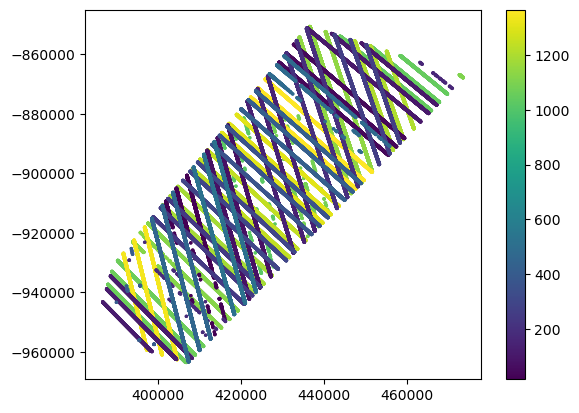

In [73]:
# scatter plot by rgt number.  this is slow!
plt.figure()
plt.scatter(np.array(D6.geometry.x), np.array(D6.geometry.y),2,c=np.array(D6.rgt))
plt.colorbar()

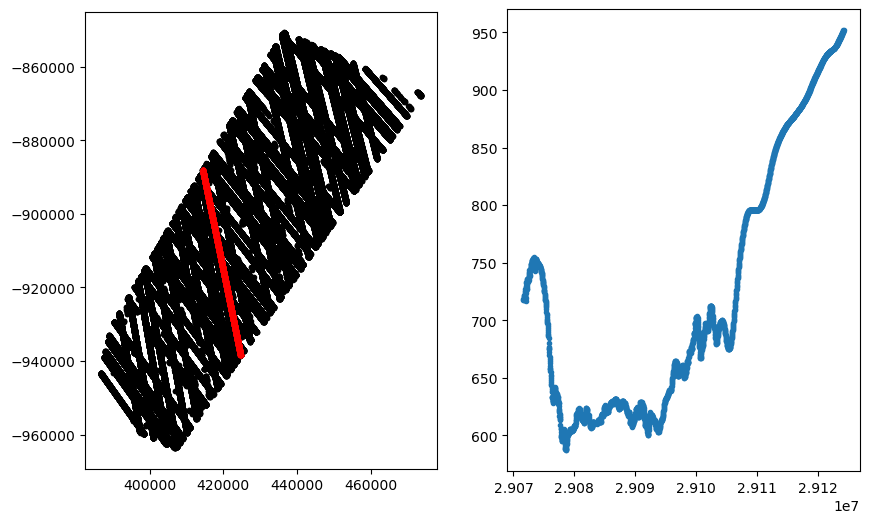

In [78]:
jj = (D6.rgt==77) & (D6.spot==3)
hf, hax = plt.subplots(1, 2, figsize=[10, 6])
hax[0].plot(D6.geometry.x, D6.geometry.y,'k.')
hax[0].plot(D6.geometry.x[jj], D6.geometry.y[jj],'r.')
hax[0].set_aspect(1)
hax[1].plot(D6.x_atc[jj], D6.h_li[jj],'.')

# Next steps: 
I'm using EarthAccess to get links to the data, which I then open with xarray.  This seems like the wrong way to do it, because xarray->s3 seems to be slow, especially for very large granules like these.

Can icePyx do this better?

Index(['w_surface_window_final', 'r_eff', 'cycle', 'h_li_sigma', 'tide_ocean',
       'n_fit_photons', 'gt', 'dh_fit_dx', 'rgt', 'bsnow_conf', 'spot',
       'sigma_geo_h', 'seg_azimuth', 'y_atc', 'x_atc', 'bsnow_h', 'segment_id',
       'h_robust_sprd', 'atl06_quality_summary', 'h_li', 'geometry'],
      dtype='object')

In [42]:
earthaccess_poly = [(jj['lon'], jj['lat']) for jj in sliderule_parms['poly']]

results = earthaccess.search_data(
    short_name = 'ATL06',
    version = '006',
    cloud_hosted = True,
    polygon=earthaccess_poly,      
    temporal = ('2019-10-01','2020-03-01'),
)

files=earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/85 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/85 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/85 [00:00<?, ?it/s]

['DEFAULT_BLOCK_SIZE',
 '__abstractmethods__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_abc_impl',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 '_details',
 '_fetch_range',
 '_initiate_upload',
 '_upload_chunk',
 'close',
 'closed',
 'commit',
 'details',
 'discard',
 'f',
 'fileno',
 'flush',
 'full_name',
 'granule',
 'info',
 'isatty',
 'read',
 'readable',
 'readinto',
 'readinto1',
 'readline',
 'readlines',
 'readuntil',
 'seek',
 'seekable',
 'tell',
 'truncate',
 'writable',
 'write',
 'writelines']

In [52]:
import re
track_re=re.compile('ATL06_\d+_(\d\d\d\d)')

track_files = {}
for file in files:
    track=int(track_re.search(file.full_name).group(1))
    if track not in track_files:
        track_files[track]=[]
    track_files[track] += [file]


KeyboardInterrupt: 

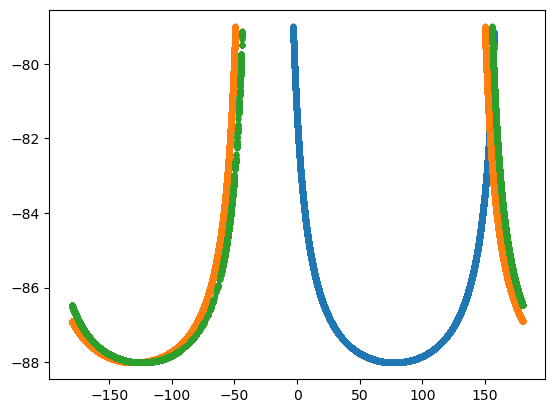

In [57]:
plt.figure()
count=0
for track, files in track_files.items():
    ds = xr.open_dataset(files[0], group='/gt2l/land_ice_segments')
    plt.plot(ds.longitude, ds.latitude,'.')
    count += 1
    if count > 5:
        break

In [56]:
ds

<xarray.Dataset> Size: 5MB
Dimensions:                (delta_time: 112071)
Coordinates:
  * delta_time             (delta_time) datetime64[ns] 897kB 2019-10-01T23:33...
    latitude               (delta_time) float64 897kB ...
    longitude              (delta_time) float64 897kB ...
Data variables:
    atl06_quality_summary  (delta_time) int8 112kB ...
    h_li                   (delta_time) float32 448kB ...
    h_li_sigma             (delta_time) float32 448kB ...
    segment_id             (delta_time) float64 897kB ...
    sigma_geo_h            (delta_time) float32 448kB ...
Attributes:
    Description:  The land_ice_height group contains the primary set of deriv...
    data_rate:    Data within this group are sparse.  Data values are provide...